In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df=pd.read_csv('/Users/amalajith/Documents/MS DS LJMU/Research References/Datasets/CO2 emission Dataset/CO2 Emissions_Canada.csv')

#### Data Description

##### Model

4WD/4X4 = Four-wheel drive
AWD = All-wheel drive
FFV = Flexible-fuel vehicle
SWB = Short wheelbase
LWB = Long wheelbase
EWB = Extended wheelbase

##### Transmission

A = Automatic
AM = Automated manual
AS = Automatic with select shift
AV = Continuously variable
M = Manual
3 - 10 = Number of gears

##### Fuel type

X = Regular gasoline
Z = Premium gasoline
D = Diesel
E = Ethanol (E85)
N = Natural gas

##### Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

##### CO2 Emissions

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

### Data Exploration

In [95]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [97]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [98]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [99]:
duplicated=df.duplicated()
duplicated.value_counts()

False    6282
True     1103
Name: count, dtype: int64

In [100]:
#Dropping duplicate records
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    6282
Name: count, dtype: int64

### Data Visualisation

In [101]:
df_make=df['Make'].value_counts().reset_index().rename(columns={'count':'Count'})
df_make

,Make,Count
0,FORD,577
1,CHEVROLET,515
2,BMW,501
3,MERCEDES-BENZ,365
4,PORSCHE,296
5,GMC,289
6,TOYOTA,276
7,AUDI,263
8,NISSAN,213
9,MINI,200


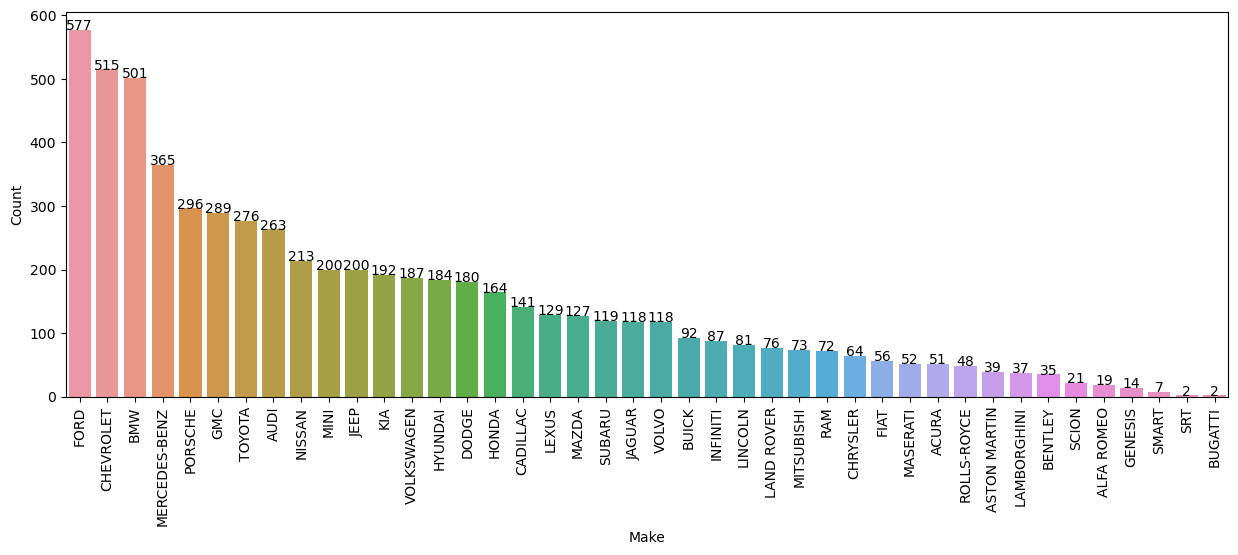

In [102]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Make',y='Count',data=df_make)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for index, row in df_make.iterrows():
    ax.text(row.name, row['Count'], row['Count'], color='black', ha="center")
plt.show()

In [103]:
order=df['Vehicle Class'].value_counts().index.tolist()

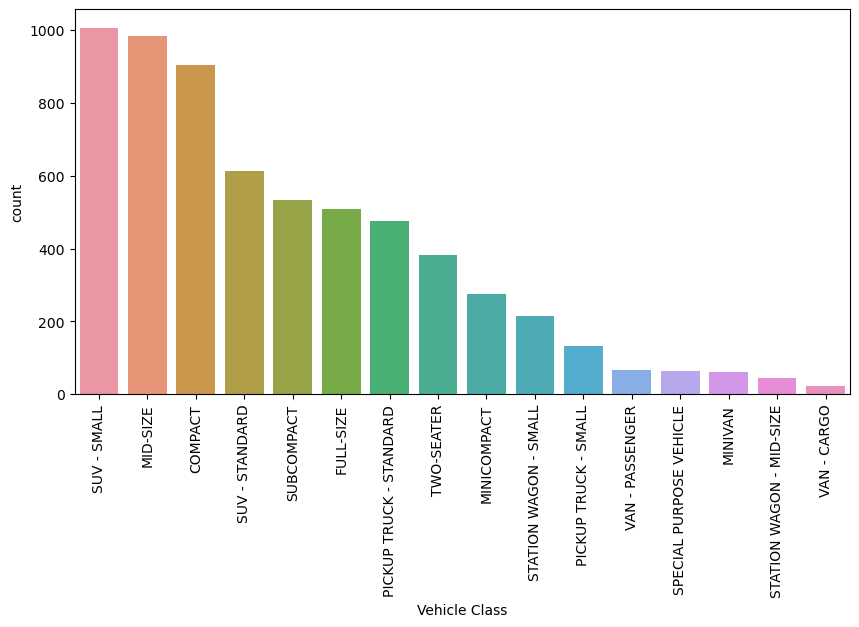

In [104]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Vehicle Class',data=df,order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [105]:
order=df['Vehicle Class'].value_counts().index.tolist()

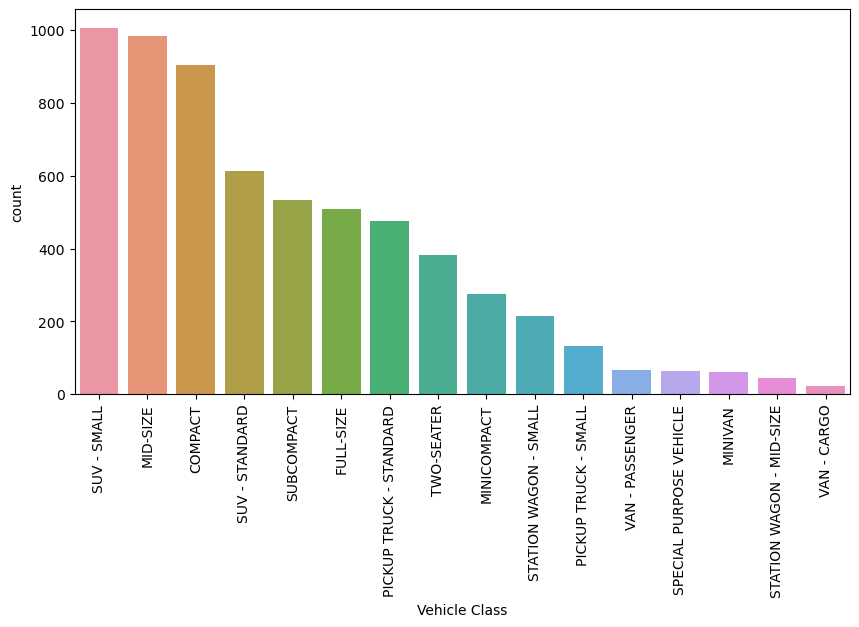

In [106]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='Vehicle Class',order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

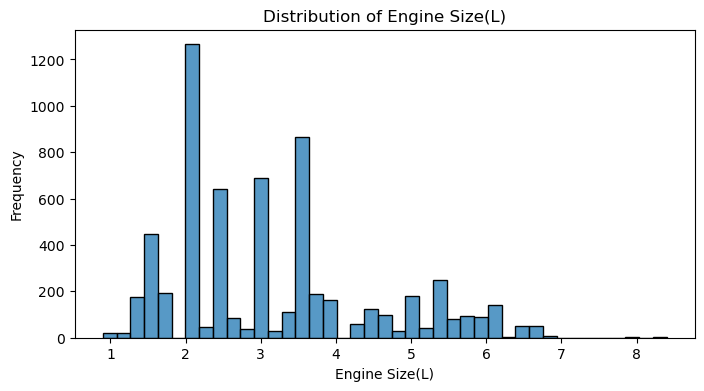

In [107]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df,x='Engine Size(L)', edgecolor='black')
plt.xlabel('Engine Size(L)')
plt.ylabel('Frequency')
plt.title('Distribution of Engine Size(L)')
plt.show()

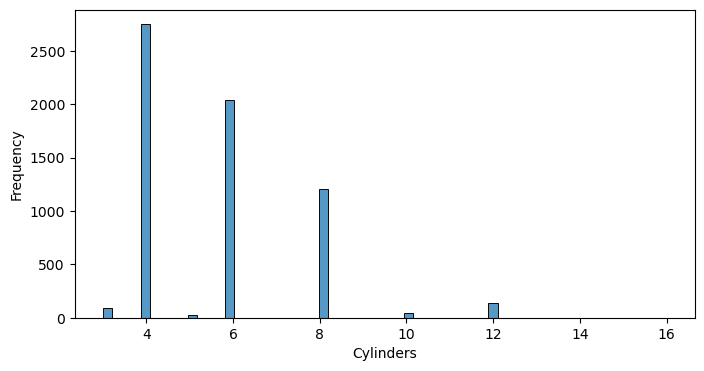

In [108]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.show()

In [109]:
df["Gears"]= df['Transmission'].str[-1]

df['Transmission']=df['Transmission'].str[0:-1]
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,6


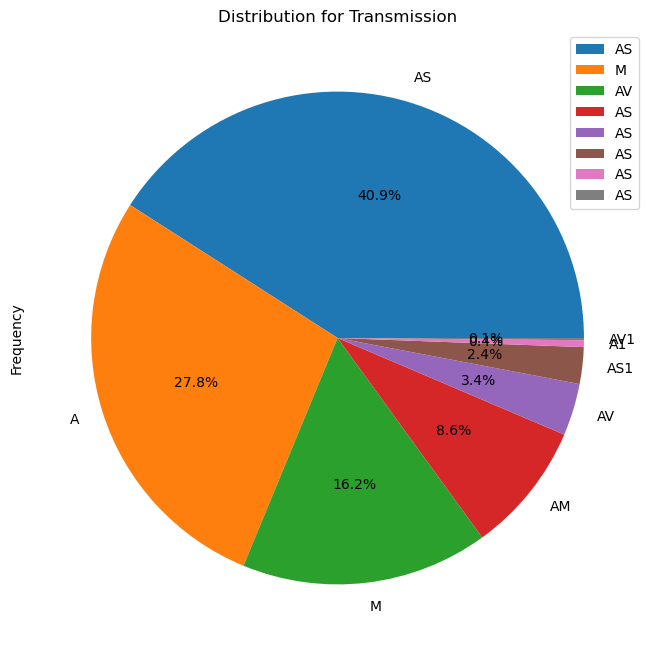

In [110]:
plt.figure(figsize=(10,8))
df['Transmission'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Distribution for Transmission")
plt.ylabel("Frequency")
plt.legend(df["Transmission"],loc='best')
plt.show()

In [111]:
order=df['Gears'].value_counts().index.tolist()

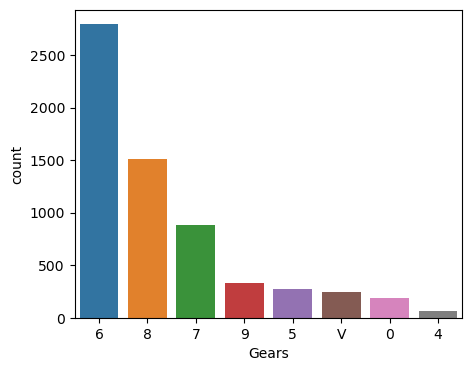

In [112]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='Gears',order=order)
plt.show()

In [113]:
df['Fuel Type'].value_counts()

Fuel Type
X    3039
Z    2765
E     330
D     147
N       1
Name: count, dtype: int64

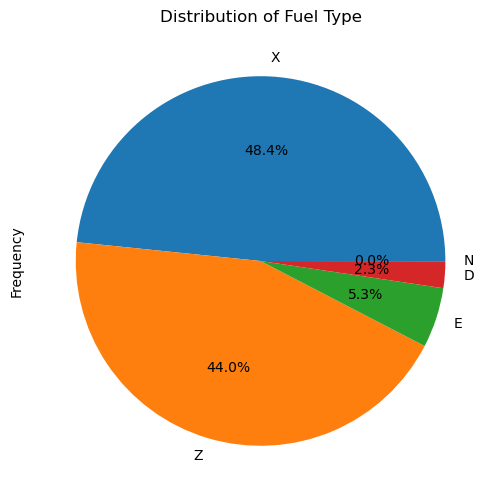

In [114]:
plt.figure(figsize=(10,6))
df['Fuel Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Distribution of Fuel Type")
plt.ylabel("Frequency")
#plt.legend(df['Fuel Type'],loc='best',bbox_to_anchor=(1.05, 1))
plt.show()

In [115]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Gears'],
      dtype='object')

In [116]:
df['Fuel Consumption City (L/100 km)'].value_counts()

Fuel Consumption City (L/100 km)
11.9    105
10.8    100
10.2     99
10.6     99
11.8     98
       ... 
22.8      1
23.1      1
6.2       1
21.6      1
26.2      1
Name: count, Length: 211, dtype: int64

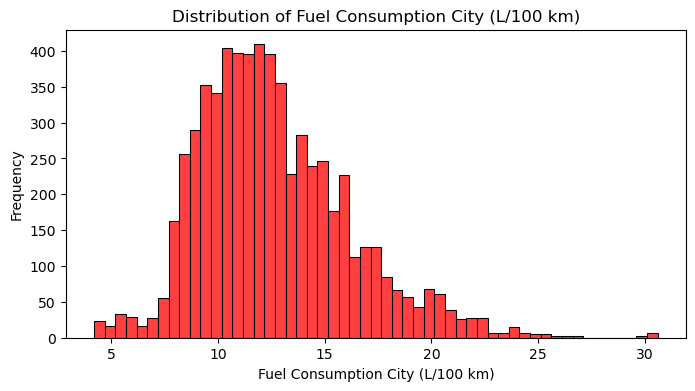

In [117]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df,x='Fuel Consumption City (L/100 km)', edgecolor='black',color='red')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Consumption City (L/100 km)')
plt.show()

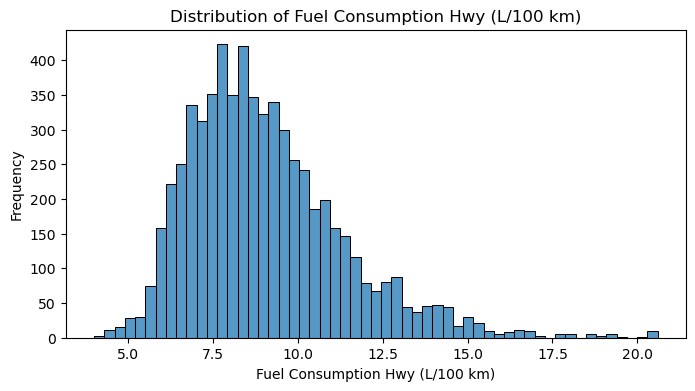

In [118]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df,x='Fuel Consumption Hwy (L/100 km)', edgecolor='black')
plt.xlabel('Fuel Consumption Hwy (L/100 km)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Consumption Hwy (L/100 km)')
plt.show()

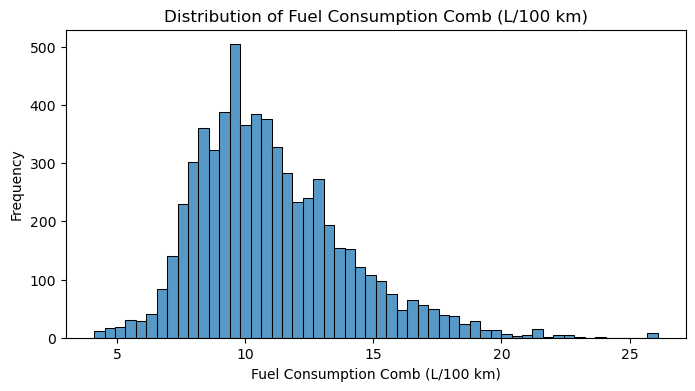

In [119]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df,x='Fuel Consumption Comb (L/100 km)', edgecolor='black')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Consumption Comb (L/100 km)')
plt.show()

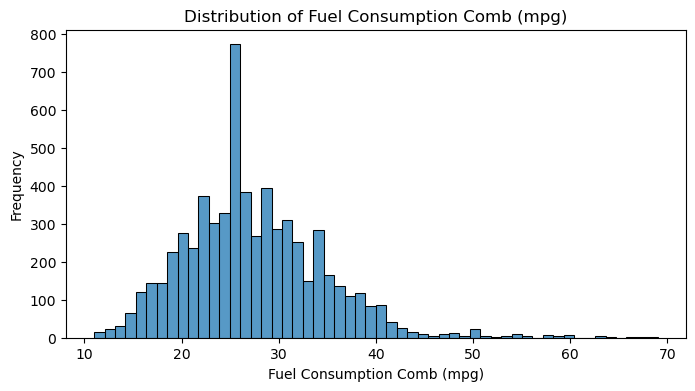

In [120]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df,x='Fuel Consumption Comb (mpg)', edgecolor='black')
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Consumption Comb (mpg)')
plt.show()

In [121]:
columns=['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']

In [122]:
corr_mat=df[columns].corr()

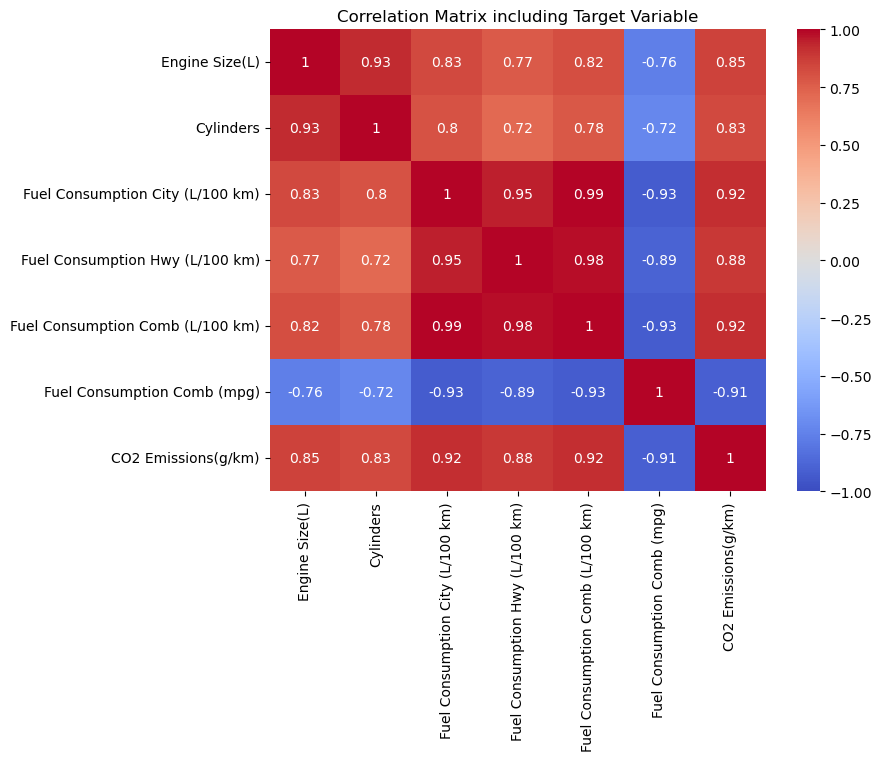

In [123]:
# Plot the heatmap
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix including Target Variable')
plt.show()

### Data Preprocessing

In [124]:
df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Transmission','Gears','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)

In [125]:
df.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,Z,8.5,196
1,2.4,4,Z,9.6,221
2,1.5,4,Z,5.9,136
3,3.5,6,Z,11.1,255
4,3.5,6,Z,10.6,244


In [126]:
df['Fuel Type'].value_counts()

Fuel Type
X    3039
Z    2765
E     330
D     147
N       1
Name: count, dtype: int64

In [127]:
df[df['Fuel Type']=='N']

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
2439,3.6,6,N,12.7,213


In [128]:
#Removing the record with Natural Gas as Fuel Type
df=df[~(df['Fuel Type']=='N')]

In [129]:
df[df['Fuel Type']=='N']

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)


In [130]:
df['Fuel Type'].value_counts()

Fuel Type
X    3039
Z    2765
E     330
D     147
Name: count, dtype: int64

In [131]:
df=pd.get_dummies(df,columns=['Fuel Type'],prefix='Fuel_Type',drop_first=True)
df.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,8.5,196,False,False,True
1,2.4,4,9.6,221,False,False,True
2,1.5,4,5.9,136,False,False,True
3,3.5,6,11.1,255,False,False,True
4,3.5,6,10.6,244,False,False,True


In [132]:
df['Fuel Consumption Comb (L/100 km)'].value_counts()

Fuel Consumption Comb (L/100 km)
9.4     125
8.4     119
9.8     115
9.1     114
10.7    111
       ... 
19.2      1
21.0      1
6.1       1
19.9      1
4.2       1
Name: count, Length: 181, dtype: int64

In [133]:
X=df.drop('CO2 Emissions(g/km)',axis=1)
Y=df['CO2 Emissions(g/km)']

In [134]:
X.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,8.5,False,False,True
1,2.4,4,9.6,False,False,True
2,1.5,4,5.9,False,False,True
3,3.5,6,11.1,False,False,True
4,3.5,6,10.6,False,False,True


### Train-Test Split

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=72)

### Feature Scaling

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model Implementation

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [154]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "MAE" : mean_absolute_error(y_train, y_train_pred),
    "MSE" : mean_squared_error(y_train, y_train_pred),                          
    "RMSE" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "MAE" : mean_absolute_error(y_test, y_pred),
    "MSE" : mean_squared_error(y_test, y_pred),
    "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

#### Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [157]:
b0=lr.intercept_
b1=lr.coef_
print("b0: ", b0)
print("b1: ", b1)

b0:  129.94969228126217
b1:  [   2.14414925    8.99345894  489.15703961 -142.89846602  -29.91518431
  -29.74107976]


In [158]:
y_train_pred=lr.predict(X_train)
y_train_pred

array([291.84693088, 211.55219892, 160.09600604, ..., 311.53145283,
       239.35063995, 242.96117653])

In [159]:
y_pred=lr.predict(X_test)
y_pred

array([216.83382891, 219.05727   , 399.36377809, ..., 225.4391341 ,
       481.12531003, 261.27148943])

In [160]:
train_val(y_train, y_train_pred, y_test, y_pred,"LR")

,LR_train,LR_test
R2,0.990815,0.990780
MAE,3.191393,3.345951
MSE,31.318734,36.247881
RMSE,5.596314,6.020621


#### Ridge Regression

In [163]:
from sklearn.linear_model import Ridge

In [164]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [165]:
ridge_model.coef_

array([   3.37567668,    9.49123676,  486.19939134, -141.90611645,
        -29.61936088,  -29.41370717])

In [166]:
y_train_pred=ridge_model.predict(X_train)
y_pred=ridge_model.predict(X_test)

In [167]:
train_val(y_train, y_train_pred, y_test, y_pred,"Ridge")

,Ridge_train,Ridge_test
R2,0.990806,0.990798
MAE,3.231780,3.385040
MSE,31.350349,36.175236
RMSE,5.599138,6.014585


#### Lasso Regression

In [172]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1).fit(X_train, y_train)

In [173]:
lasso.coef_

array([  14.17427378,    2.16847941,  467.5700159 , -122.10204214,
        -16.27607793,  -15.19103152])

In [174]:
y_pred = lasso.predict(X_test)
y_train_pred=lasso.predict(X_train)

In [175]:
train_val(y_train, y_train_pred, y_test, y_pred,"Lasso")

,Lasso_train,Lasso_test
R2,0.988895,0.989393
MAE,3.912905,4.045469
MSE,37.865603,41.700764
RMSE,6.153503,6.457613


#### KNN

In [176]:
from sklearn.neighbors import KNeighborsRegressor

In [177]:
knn = KNeighborsRegressor().fit(X_train, y_train)

In [178]:
knn

KNeighborsRegressor()

In [180]:
y_pred=knn.predict(X_test)
y_train_pred=knn.predict(X_train)

In [181]:
train_val(y_train, y_train_pred, y_test, y_pred,"KNN")

,KNN_train,KNN_test
R2,0.996671,0.995752
MAE,2.190963,2.705489
MSE,11.349530,16.700270
RMSE,3.368906,4.086596


#### SVR

In [185]:
from sklearn.svm import SVR

In [193]:
svr= SVR(kernel="rbf",C=1.0, epsilon=0.1).fit(X_train, y_train)

In [194]:
y_pred=svr.predict(X_test)

In [196]:
y_train_pred=svr.predict(X_train)

In [197]:
train_val(y_train, y_train_pred, y_test, y_pred,"SVR")

,SVR_train,SVR_test
R2,0.914007,0.904301
MAE,11.728935,12.734582
MSE,293.210738,376.224750
RMSE,17.123397,19.396514


#### Random Forest Regressor

In [198]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
rfr=RandomForestRegressor(random_state = 42)

In [203]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [204]:
y_pred=rfr.predict(X_test)
y_train_pred=rfr.predict(X_train)

In [205]:
train_val(y_train, y_train_pred, y_test, y_pred,"RFR")

,RFR_train,RFR_test
R2,0.998492,0.997548
MAE,1.653092,2.258623
MSE,5.140171,9.639179
RMSE,2.267195,3.104703
